In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker

In [51]:
h = 6.62607015 * 10**(-34)

In [54]:
data = pd.read_excel('data.xlsx')
NeonA = np.array(data['Neon, A'])
NeonC = np.array(data['Neon, C'])
HgA = np.array(data['Hg, A'].dropna())
HgC = np.array(data['Hg'].dropna())
Lambda = np.concatenate([NeonA, HgA])
Angle = np.concatenate([NeonC, HgC])

data

,"Neon, A","Neon, C",Unnamed: 2,"Hg, A",Hg,Unnamed: 5,H,H.1,H.2,Unnamed: 9,h,angle,lambda
0,5331,2182,NaN,4047.0,620.0,NaN,H,2800.0,NaN,NaN,h,2656.0,NaN
1,5341,2193,NaN,4358.0,1169.0,NaN,H,1790.0,NaN,NaN,h,2551.0,NaN
2,5401,2232,NaN,4916.0,1845.0,NaN,H,1142.0,NaN,NaN,h,1973.0,NaN
3,5852,2498,NaN,5461.0,2272.0,NaN,H,716.0,NaN,NaN,NaN,NaN,NaN
4,5882,2515,NaN,5770.0,2452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5945,2548,NaN,5791.0,2463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5976,2561,NaN,6234.0,2673.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6030,2587,NaN,6907.0,2910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6074,2606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6096,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


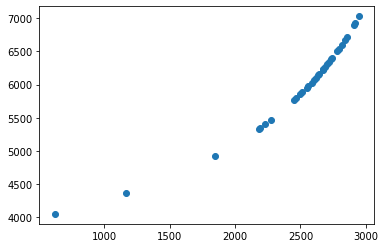

In [55]:
plt.scatter(Angle, Lambda)

In [57]:
print(Angle)
print(Lambda)

[2182. 2193. 2232. 2498. 2515. 2548. 2561. 2587. 2606. 2616. 2635. 2644.
 2670. 2690. 2705. 2716. 2736. 2741. 2780. 2792. 2814. 2842. 2856. 2919.
 2948.  620. 1169. 1845. 2272. 2452. 2463. 2673. 2910.]
[5331. 5341. 5401. 5852. 5882. 5945. 5976. 6030. 6074. 6096. 6143. 6164.
 6217. 6267. 6305. 6334. 6383. 6402. 6507. 6533. 6599. 6678. 6717. 6929.
 7032. 4047. 4358. 4916. 5461. 5770. 5791. 6234. 6907.]


In [91]:
def rid(Lambda, m):
    return 1/(Lambda * (1/4 - 1/((m+3)**2)))

In [59]:
def se(a):
    a = np.array(a)
    return np.sqrt(((sum(abs(np.mean(a) - a))**2))/len(a))

In [60]:
def se_rel(a):
    return np.sqrt(((sum(abs(np.mean(a) - a))**2))/len(a))/np.mean(a)

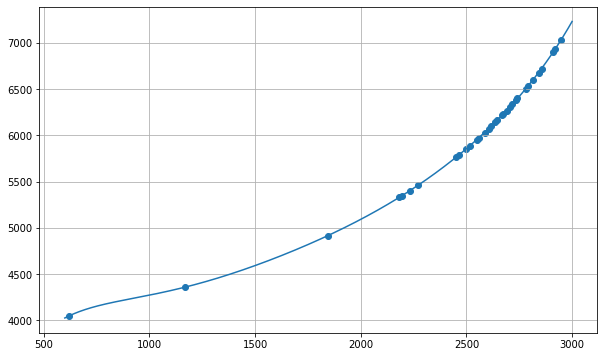

(array([ 8.25711965e-20, -1.08246698e-15,  5.99266777e-12, -1.80153116e-08,
         3.16258066e-05, -3.19927801e-02,  1.75833632e+01,  7.75955112e+01]),
 array([410.78856775]),
 8,
 array([2.78629322e+00, 4.67223127e-01, 1.32671860e-01, 2.56002491e-02,
        3.91538040e-03, 3.12310678e-04, 1.16809309e-05, 1.33631431e-07]),
 7.327471962526033e-15)

In [74]:
opt = np.polyfit(Angle, Lambda, 7, full=True)
plt.figure(figsize=(10,6))
plt.scatter(Angle, Lambda)
plt.plot(np.linspace(600, 3000, 1000), np.poly1d(opt[0])(np.linspace(600, 3000, 1000)))
plt.grid()
plt.savefig('10.png', dpi = 400)
plt.show()

opt

In [20]:
np.sum(abs(opt[3]-opt[0]))

4831717366.297898

opt  [ 8.37189170e-17 -8.83727391e-13  3.82573803e-09 -8.48211285e-06
  1.02311342e-02 -5.73536031e+00  5.20250309e+03]
error  [2.30251181e-33 3.13653339e-25 6.91683326e-18 3.98362489e-11
 6.52408228e-05 2.65089204e+01 1.56695757e+06]
S_e =  33039.354468361635


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


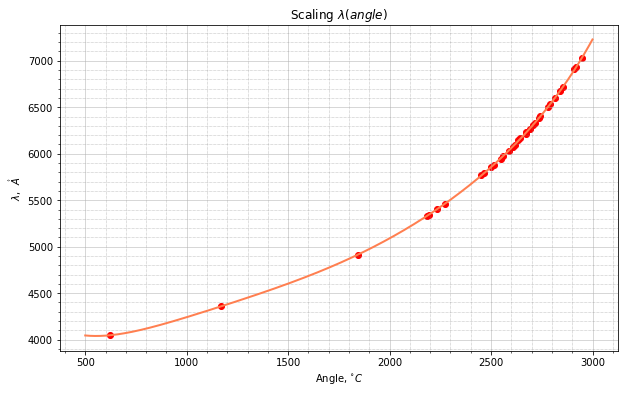

In [83]:
def approx(x, a6, a5, a4, a3, a2, a1, a0):
    return a6*x**6+a5*x**5+a4*x**4+a3*x**3+a2*x**2+a1*x+a0
beta_opt1, beta_cov1 = curve_fit(approx, Angle, Lambda)
print('opt ', beta_opt1) 


#получим погрешности для коэффициентов
print('error ', np.diag(beta_cov1) )


residuals1 = lam - approx(an,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(an))
print('S_e = ', S_e)

# график

fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(500, 3000, 0.1)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(Angle, Lambda, c = 'r')
# lgnd = ax.legend([r'$\lambda(x)$ ={0:.4f} $\cdot\;x^{7}$ + {0:.4f} $\cdot\;x^{6}$ + {0:.4f} $\cdot\;x^{5}$ + {0:.4f} $\cdot\;x^{4}$ + {0:.4f} $\cdot\;x^{3}$ + {0:.4f} $\cdot \; x^{2}$ + {0:.4f} $\cdot \; x$ + {0:.4f} '.format(*beta_opt1), 'Data'], loc='upper left', shadow=True)

ax.set_title(r'Scaling $\lambda(angle)$')
ax.set_ylabel(r'$\lambda, \;\; \mathring{A}$')
ax.set_xlabel(r'Angle, $^{\circ}С$')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
# plt.errorbar(Angle, Lambda, fmt = 'ro', markersize = '5', yerr = S_e, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')



plt.savefig('Scale.png', dpi=400, quality=100)
plt.show()

In [101]:
np.poly1d(beta_opt1)(1973)


5057.868777921911

In [92]:
lam_H = [6558.1, 4860.0, 4339.1, 4078.0 ]

In [96]:
r = []
for i in range(4):
    print('%.1f' %(rid(lam_H[i]/10**8, i)))
    r.append(rid(lam_H[i]/10**8, i))
np.mean(r)

109787.9
109739.4
109744.1
110348.2


109904.88516348065

In [98]:
se_rel(r)
np.array(r).std()

256.6523754853318

In [161]:
np.mean(r)

109772.98469099202

In [102]:
lam_I = [6187.6, 5958.0, 5057.9]

In [108]:
nu = 3*10**(18)/np.array(lam_I)
nu

array([4.84840649e+14, 5.03524673e+14, 5.93131537e+14])

In [109]:
en2 = h * (nu[1]-nu[0])/(5*1.6*10**(-19))
en2

0.015475206439338106

In [110]:
en_edge = h*nu[2]/(1.6*10**(-19))
en_edge

2.4563319818996026

In [112]:
en15 = h*nu[0]/(1.6*10**(-19))
en15

2.00786759506917

In [113]:
en10 = h*nu[0]/(1.6*10**(-19))
en10 

2.00786759506917

In [114]:
en1 = 0.027
en_el = en10 + en1
en_el

2.03486759506917

In [115]:
D1 = en_edge - 0.94
D1

1.5163319818996026

In [116]:
D2 = en_edge - en_el
D2

0.4214643868304324